In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
data = pd.read_csv('../../data/World GDP(GDP, GDP per capita, and annual growths)/gdp.csv')

In [15]:
data_2000_2015 = pd.concat([data.iloc[:, 0], data.iloc[:, 42:-6]], axis=1)

In [16]:
data_2000_2015 = data_2000_2015.dropna()

In [17]:
data_name_without_null = data_2000_2015.iloc[:, 0]

# 找出2008年左右GDP变化最大的五个国家
根据2008，2009，2010三年的GDP增长率的平均值进行排名

In [18]:
data_2008_2010 = data_2000_2015.iloc[:, 9:-4]

In [19]:
data_2008_2010 = np.array(data_2008_2010)
data_2008_2010_growth_rate = (data_2008_2010[:, 1:] - data_2008_2010[:, :-1]) / data_2008_2010[:, :-1]
data_2008_2010_growth_rate = data_2008_2010_growth_rate * 100
data_2008_2010_growth_rate_avg = np.mean(data_2008_2010_growth_rate, axis=1)

第六位为低收入，所以不纳入

In [20]:
max_indices = np.append(np.argsort(data_2008_2010_growth_rate_avg)[:5], np.argsort(data_2008_2010_growth_rate_avg)[6])

In [21]:
data_2000_2015_max5 = data_2000_2015.iloc[max_indices, :]

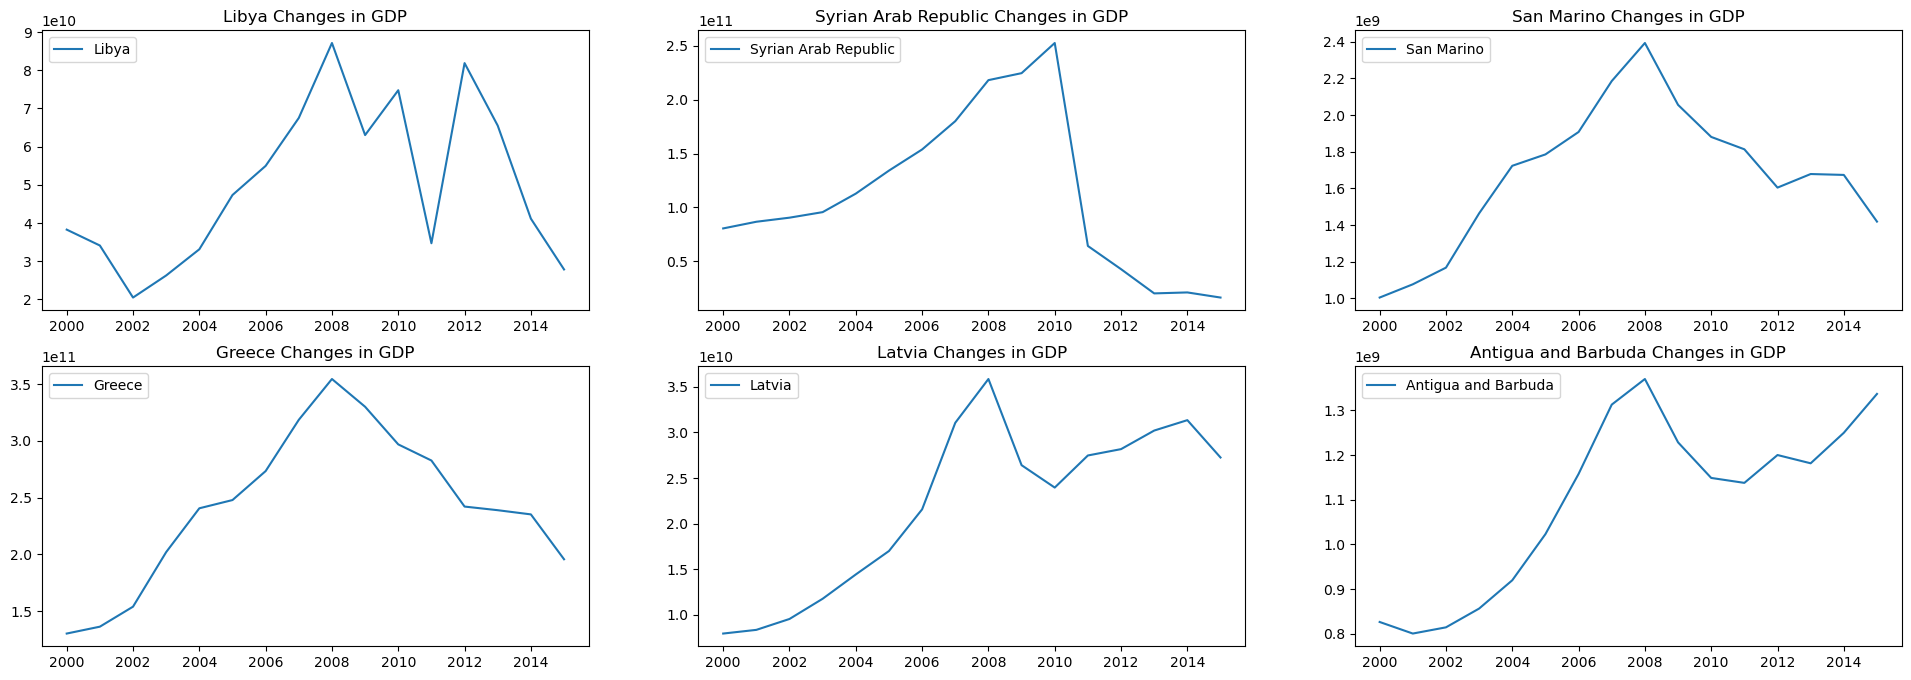

In [23]:
plt.figure(figsize=(24, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.title(str(data_2000_2015_max5.iloc[i, 0]) + ' Changes in GDP')
    plt.plot([i for i in range(2000, 2016)], data_2000_2015_max5.iloc[i, 1:], label=data_2000_2015_max5.iloc[i, 0])
    plt.legend(loc='upper left')
plt.show()

# 根据这六个国家，对CPI进行分析

In [24]:
countries_name = data_name_without_null.iloc[max_indices]

In [55]:
cpi_data = pd.read_csv('../../data/GemDataEXTR/CPI_Price.csv').iloc[6:-8, 1:]

In [51]:
cpi_data_year = [i for i in range(2000, 2016)]

In [70]:
# 提取存在的列
existing_columns = [col for col in countries_name if col in cpi_data.columns]
selected_columns = cpi_data[existing_columns]

In [71]:
countries_name = selected_columns.columns.tolist()

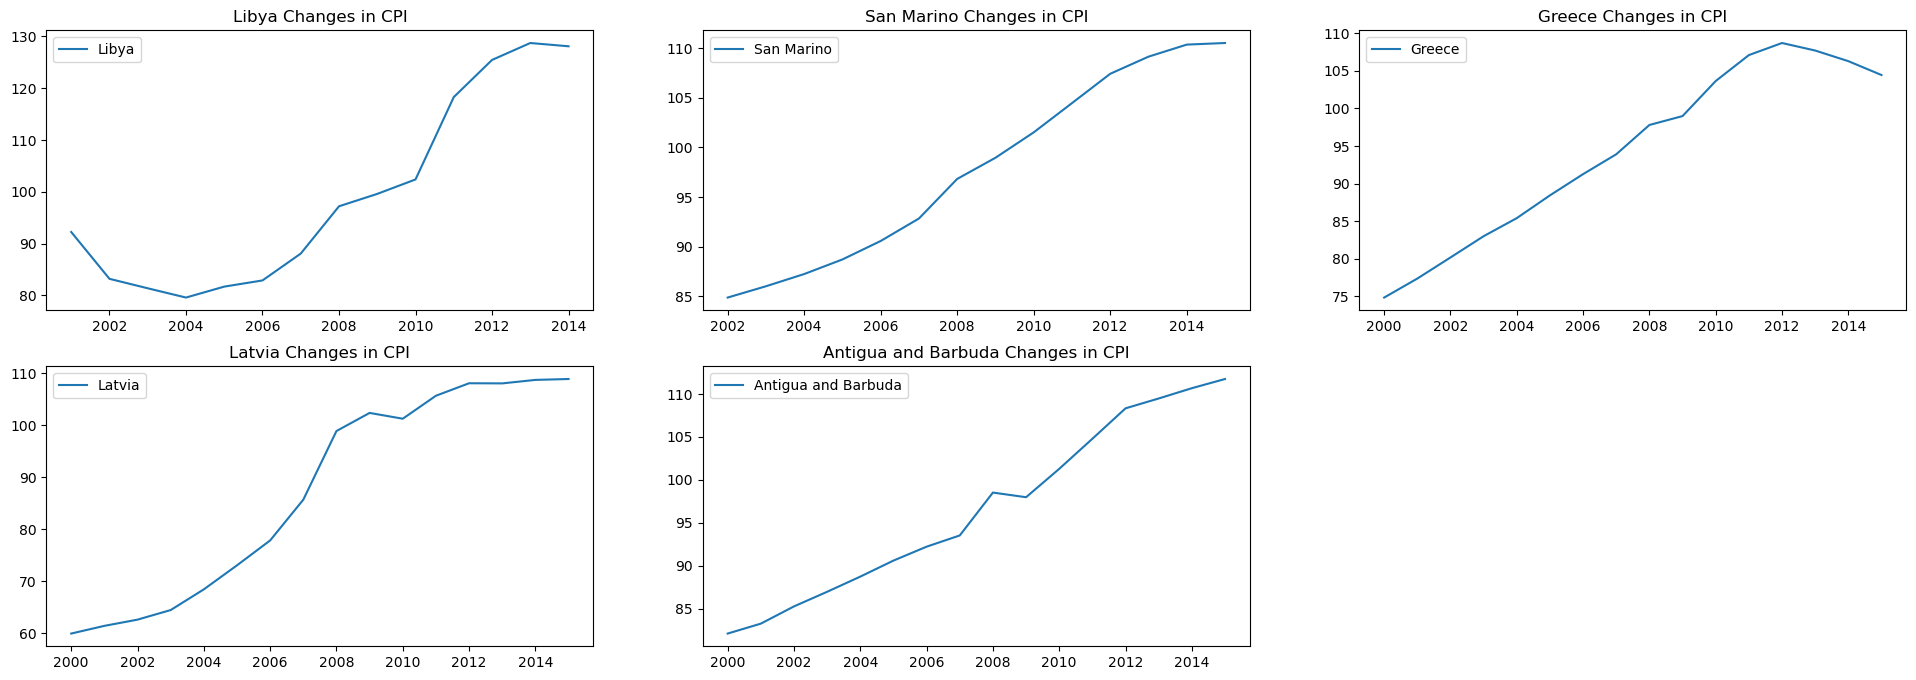

In [77]:
plt.figure(figsize=(24, 8))
for i in range(len(selected_columns.columns)):
    plt.subplot(2, 3, i + 1)
    plt.title(str(countries_name[i]) + ' Changes in CPI')
    plt.plot(cpi_data_year, selected_columns.iloc[:, i], label=countries_name[i])
    plt.legend(loc='upper left')
plt.show()

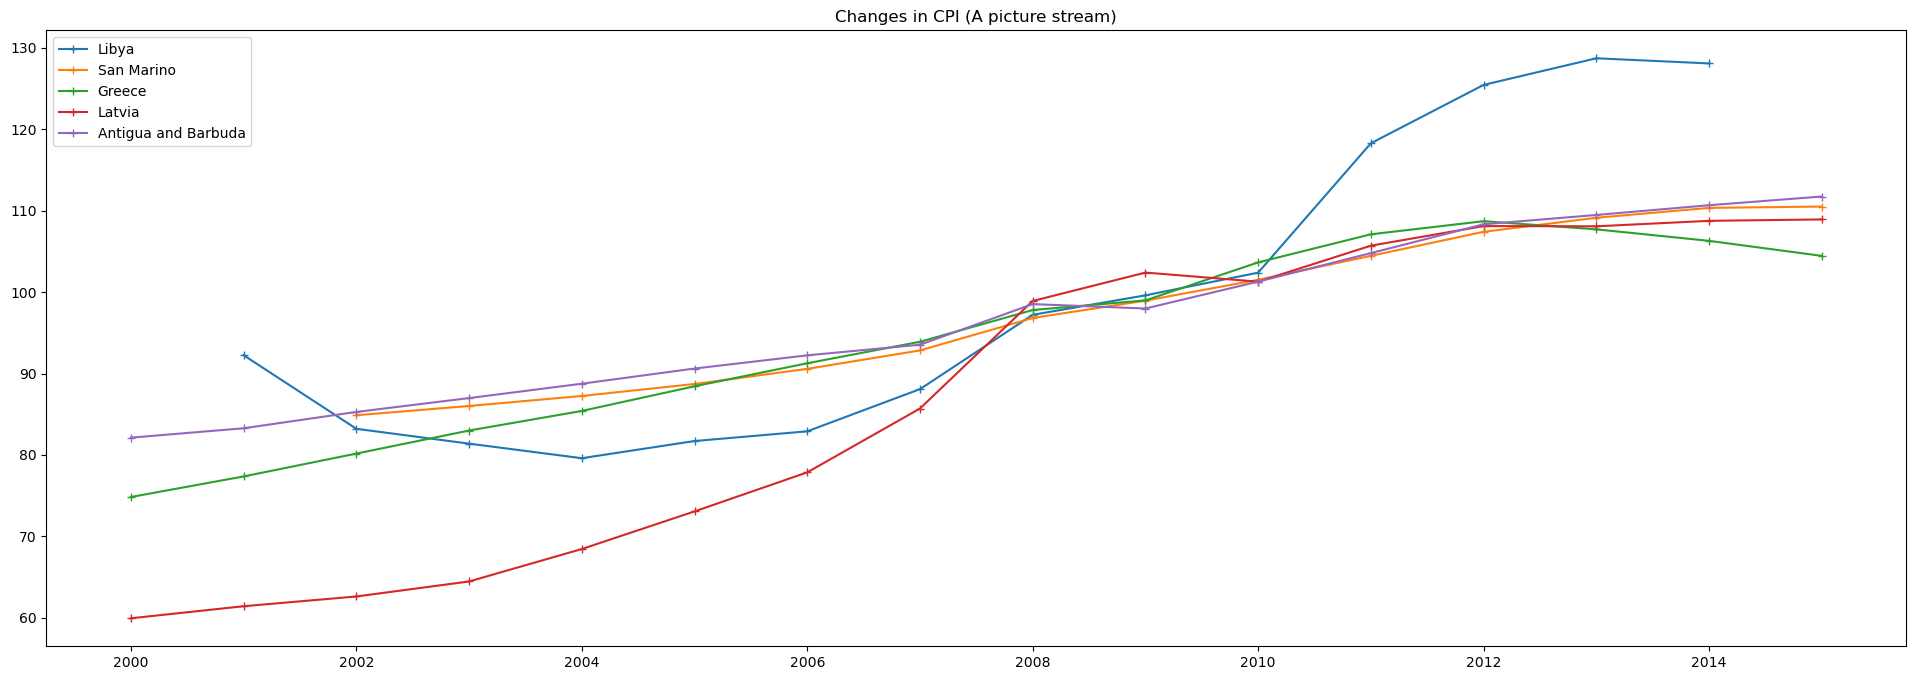

In [79]:
plt.figure(figsize=(24, 8))
plt.title('Changes in CPI (A picture stream)')
for i in range(len(selected_columns.columns)):
    plt.plot(cpi_data_year, selected_columns.iloc[:, i], label=countries_name[i],marker='+')
    plt.legend(loc='upper left')
plt.show()